# Linear Stability Analysis

Applying Linear stability analysis on a perturbed planar solidification front, where the perturbations are $\delta sin(\omega x)$, we get:

$$\frac{\dot{\delta}}{\delta} = \frac{Db}{C_0(k-1)} \big[ k_{\omega} - \frac{v(1-k)}{D} \big] + v\big[ k_{\omega} -\frac{v}{D} \big]$$



Where: 

$k_{\omega} = \frac{v}{2D} + \sqrt{\frac{v^2}{4D^2} + \omega^2}$

$b = \frac{G+\Gamma \omega^2}{m}$

$\omega$ is the mode of the perturbation

$v$ is the velocity of the interface

$\Gamma_{sl} = \frac{\gamma_{sl} T_m}{L_f}$ is the Gibbs-Thompson parameter

$k$ is the partition coefficient

$m$ is the slope of the liquidus line

$D$ is the diffusivity of the solute atom

$G$ is the Temperature gradient at the interface

$C_0$ is the composition at the interface


In [64]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [65]:
# Define the variables. We have already calculated many of these values for previous analyses.
# At a composition of C_0 = 0.1

C_0 = 0.1
k = 0.82
m = -256.167 # K
D = 9.6975e-07 # m^2/s
T_m = 1701.172 # K

# Values for Nickel
rho = 8900       # density            Kg/m^3
L_f = 297000     # Heat of fusion     J/Kg
gam = 0.38       # J/m^2 - Approximate value, taken from s-l interface energy of Nickel

Gam = gam*T_m/(L_f*rho)
#Gam = 0.00003

# Assigned values

v = 10e-6 # m/s = 10um/s
G = 5e3   # K/m = 5K/mm

# Derived variables

def k_w(w):
    
    return v/(2*D) + np.sqrt(np.power(v/(2*D),2) + np.power(w,2))

def b(w):
    
    return (G - Gam*np.power(w,2))/m

print(Gam)

2.445599667082813e-07


In [59]:
def ddotByd(w):
    
    return D*b(w)/(C_0*(k-1))*(k_w(w) - v*(1-k)/D) + v*(k_w(w) - v/D)

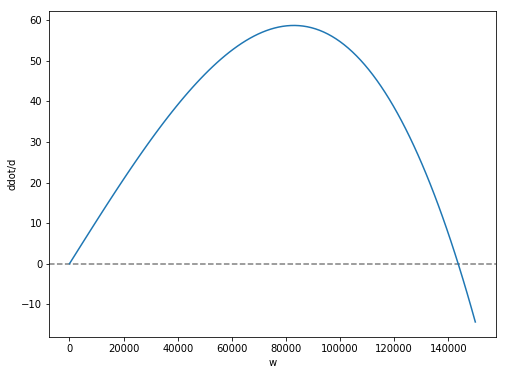

In [63]:
w_list = np.linspace(0,150000,100)

fig,ax = plt.subplots(figsize=(8,6))

#ax.set_xlim(0,40)
ax.set_xlabel("w")
ax.set_ylabel("ddot/d")
ax.axhline(0,0,1,linestyle='--',color='gray')
ax.plot(w_list,ddotByd(w_list))